In [1]:
############################### standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
###### visualize the data
data=pd.read_excel(r"C:\Users\POULAMI\Desktop\own data\Train_Breast_Cancer.xlsx")
data.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


# EDA

In [3]:
#####################33 counting each feature variable grouping by terget variable
data.groupby("Irradiat").count()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad
Irradiat,,,,,,,,,
no,213,213,213,213,213,213,213,213,213
yes,60,60,60,60,60,60,60,60,60


In [4]:
data.shape

(273, 10)

In [5]:
####################### checking if there is null value or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        273 non-null    object
 1   Age          273 non-null    object
 2   Menopause    273 non-null    object
 3   Tumor-size   273 non-null    object
 4   Inv-nodes    273 non-null    object
 5   Node-caps    273 non-null    object
 6   Deg-malig    273 non-null    int64 
 7   Breast       273 non-null    object
 8   Breast-quad  273 non-null    object
 9   Irradiat     273 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.5+ KB


In [109]:
################################ ratio of "no" class
len(data[data["Irradiat"]=="no"])/len(data)

0.7802197802197802

In [6]:
############################### ratio of "yes" class
len(data[data["Irradiat"]=="yes"])/len(data)      ##### since 0.21<<0.78,,so our data is imbalanced

0.21978021978021978

<AxesSubplot:xlabel='Tumor-size', ylabel='count'>

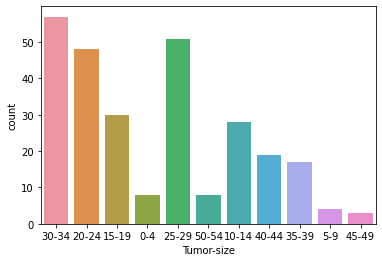

In [7]:
############### countplot for tumor-size
sns.countplot(x="Tumor-size",data=data)
### tumor size group 30-34 has heighest frequency

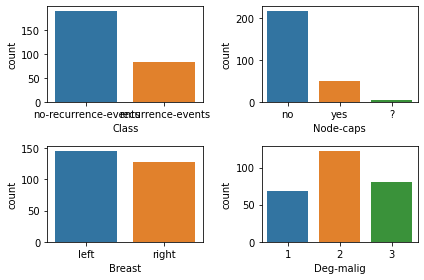

In [8]:
################## countplot for class,node-caps,breast,deg-malig
fig, axes = plt.subplots(2, 2)
sns.countplot(x="Class",data=data,ax=axes[0,0])
sns.countplot(x="Node-caps",data=data,ax=axes[0,1])
sns.countplot(x="Breast",data=data,ax=axes[1,0])
sns.countplot(x="Deg-malig",data=data,ax=axes[1,1])
fig.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='count'>

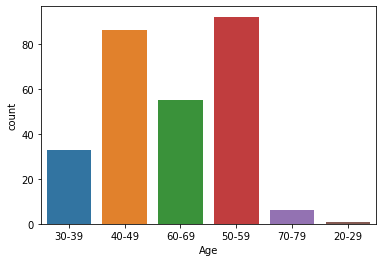

In [9]:
################## countplot for age
sns.countplot(x="Age",data=data)
#### 50-59 age group has heighest count

<AxesSubplot:xlabel='Inv-nodes', ylabel='count'>

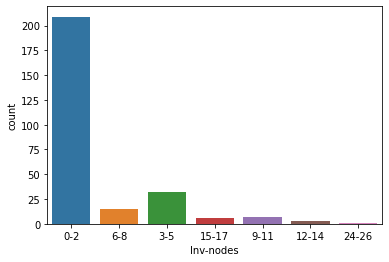

In [11]:
################ countplot for inv-nodes
sns.countplot(x="Inv-nodes",data=data)
### Inv-nodes 0-2 has heighest count

<AxesSubplot:xlabel='Menopause', ylabel='count'>

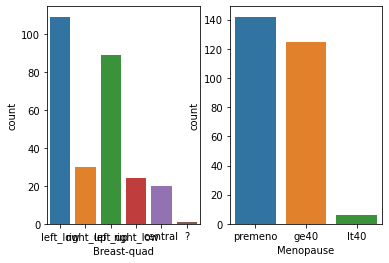

In [19]:
############ countplot for breast-quad and menopause
plt.subplot(1,2,1)
sns.countplot(x="Breast-quad",data=data)
plt.subplot(1,2,2)
sns.countplot(x="Menopause",data=data)

In [24]:
########## dataframe with Irradiat="no" case
data_no=data[data["Irradiat"]=="no"]
data_no.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [25]:
########## dataframe with Irradiat="yes" case
data_yes=data[data["Irradiat"]=="yes"]
data_yes.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
127,no-recurrence-events,40-49,premeno,5-9,0-2,no,1,left,left_low,yes
128,no-recurrence-events,30-39,premeno,40-44,0-2,no,2,left,left_low,yes
133,no-recurrence-events,40-49,premeno,45-49,0-2,no,2,left,left_low,yes
135,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
136,no-recurrence-events,60-69,ge40,50-54,0-2,no,2,right,left_up,yes


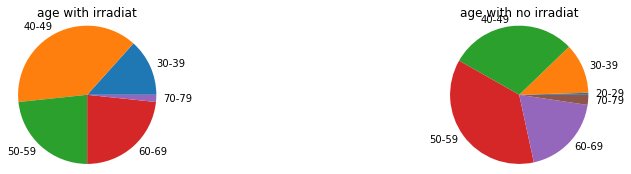

In [27]:
############## visulizing from each levels of age how many are in "yes" and "no" class for Irradiat
age_with_irradiat_yes = (data_yes.groupby(["Age"]).count()["Irradiat"]/data_yes.groupby(["Age"]).count()["Irradiat"].sum())
age_with_irradiat_no = (data_no.groupby(["Age"]).count()["Irradiat"]/data_no.groupby(["Age"]).count()["Irradiat"].sum())
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(age_with_irradiat_yes.values, labels=age_with_irradiat_yes.index, radius = 1.2)
ax2 = fig.add_axes([1, .0, .5, .5], aspect=1)
ax2.pie(age_with_irradiat_no.values, labels=age_with_irradiat_no.index, radius = 1.2)
ax1.set_title('age with irradiat')
ax2.set_title('age with no irradiat')
plt.show()

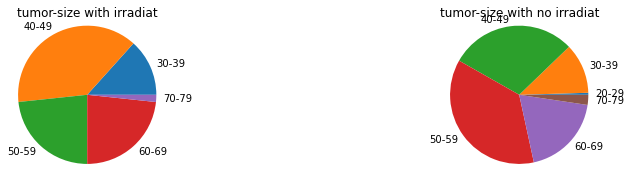

In [30]:
############## visulizing from each levels of tumor-size how many are in "yes" and "no" class for Irradiat
tumor_size_with_irradiat_yes = (data_yes.groupby(["Tumor-size"]).count()["Irradiat"]/data_yes.groupby(["Tumor-size"]).count()["Irradiat"].sum())
tumor_size_with_irradiat_no = (data_no.groupby(["Tumor-size"]).count()["Irradiat"]/data_no.groupby(["Tumor-size"]).count()["Irradiat"].sum())
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(age_with_irradiat_yes.values, labels=age_with_irradiat_yes.index, radius = 1.2)
ax2 = fig.add_axes([1, .0, .5, .5], aspect=1)
ax2.pie(age_with_irradiat_no.values, labels=age_with_irradiat_no.index, radius = 1.2)
ax1.set_title('tumor-size with irradiat')
ax2.set_title('tumor-size with no irradiat')
plt.show()

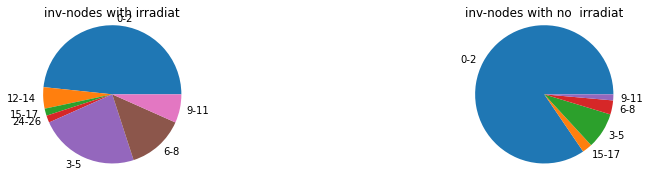

In [31]:
############## visulizing from each levels of inv_nodes how many are in "yes" and "no" class for Irradiat
inv_nodes_with_irradiat_yes = (data_yes.groupby(["Inv-nodes"]).count()["Irradiat"]/data_yes.groupby(["Inv-nodes"]).count()["Irradiat"].sum())
inv_nodes_with_irradiat_no = (data_no.groupby(["Inv-nodes"]).count()["Irradiat"]/data_no.groupby(["Inv-nodes"]).count()["Irradiat"].sum())
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(inv_nodes_with_irradiat_yes.values, labels=inv_nodes_with_irradiat_yes.index, radius = 1.2)
ax2 = fig.add_axes([1, .0, .5, .5], aspect=1)
ax2.pie(inv_nodes_with_irradiat_no.values, labels=inv_nodes_with_irradiat_no.index, radius = 1.2)
ax1.set_title('inv-nodes with irradiat')
ax2.set_title('inv-nodes with no  irradiat')
plt.show()

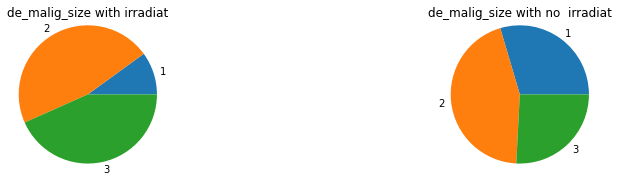

In [32]:
############## visulizing from each levels of de-malig-size how many are in "yes" and "no" class for Irradiat
de_malig_size_with_irradiat_yes = (data_yes.groupby(["Deg-malig"]).count()["Irradiat"]/data_yes.groupby(["Deg-malig"]).count()["Irradiat"].sum())
de_malig_size_with_irradiat_no = (data_no.groupby(["Deg-malig"]).count()["Irradiat"]/data_no.groupby(["Deg-malig"]).count()["Irradiat"].sum())
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(de_malig_size_with_irradiat_yes.values, labels=de_malig_size_with_irradiat_yes.index, radius = 1.2)
ax2 = fig.add_axes([1, .0, .5, .5], aspect=1)
ax2.pie(de_malig_size_with_irradiat_no.values, labels=de_malig_size_with_irradiat_no.index, radius = 1.2)
ax1.set_title('de_malig_size with irradiat')
ax2.set_title('de_malig_size with no  irradiat')
plt.show()

In [33]:
########## checking unique attributes of each column
data["Class"].unique()

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [34]:
data["Age"].unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [35]:
data["Menopause"].unique()

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [36]:
data["Tumor-size"].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [37]:
data["Inv-nodes"].unique()

array(['0-2', '6-8', '3-5', '15-17', '9-11', '12-14', '24-26'],
      dtype=object)

In [38]:
data["Node-caps"].unique()   ##### "Node-caps" column contains ?

array(['no', 'yes', '?'], dtype=object)

In [39]:
data["Deg-malig"].unique()

array([3, 2, 1], dtype=int64)

In [40]:
data["Breast"].unique()

array(['left', 'right'], dtype=object)

In [41]:
data["Breast-quad"].unique()   ### "Breast-quad" column contains ?

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

In [42]:
data["Irradiat"].unique()

array(['no', 'yes'], dtype=object)

In [43]:
###### visualizing rows with ?
print(data[data["Node-caps"].str.contains(r'[?]') |
         data["Breast-quad"].str.contains(r'[?]') ])   

                    Class    Age Menopause Tumor-size Inv-nodes Node-caps  \
135  no-recurrence-events  40-49   premeno      25-29       0-2         ?   
153  no-recurrence-events  60-69      ge40      25-29       3-5         ?   
172  no-recurrence-events  50-59      ge40      30-34      9-11         ?   
194     recurrence-events  50-59      ge40      30-34       0-2        no   
221     recurrence-events  70-79      ge40      15-19      9-11         ?   
251     recurrence-events  50-59      lt40      20-24       0-2         ?   

     Deg-malig Breast Breast-quad Irradiat  
135          2   left   right_low      yes  
153          1  right    left_low      yes  
172          3   left    left_low      yes  
194          3   left           ?       no  
221          1   left    left_low      yes  
251          1   left    left_low       no  


In [44]:
#### droping rows with ?
data_drop=(data.drop(data[data["Node-caps"].str.contains(r'[?]') |
         data["Breast-quad"].str.contains(r'[?]') ].index))
data_drop.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [45]:
############## changing categorical to numerical values
data1=pd.DataFrame()
class_mapper={'no-recurrence-events':0,'recurrence-events':1}
data1["Class"] =data_drop["Class"].replace(class_mapper)
age_mapper={'30-39':1, '40-49':2, '60-69':3, '50-59':4, '70-79':5, '20-29':6}
data1["Age"]=data_drop["Age"].replace(age_mapper)
menopause_mapper={'premeno':1, 'ge40':2, 'lt40':3}
data1["Menopause"]=data_drop["Menopause"].replace(menopause_mapper)
tumor_size_mapper={'30-34':1, '20-24':2, '15-19':3, '0-4':4, '25-29':5, '50-54':6, '10-14':7,
       '40-44':8, '35-39':9, '5-9':10, '45-49':11}
data1["Tumor-size"]=data_drop["Tumor-size"].replace(tumor_size_mapper)
inv_nodes_mapper={'0-2':1, '6-8':2, '3-5':3, '15-17':4, '9-11':5, '12-14':6, '24-26':7}
data1["Inv-nodes"]=data_drop["Inv-nodes"].replace(inv_nodes_mapper)
nodes_caps_mapper={'yes':0,'no':1}
data1["Node-caps"]=data_drop["Node-caps"].replace(nodes_caps_mapper)
breast_mapper={'left':0,'right':1}
data1["Breast"]=data_drop["Breast"].replace(breast_mapper)
breast_quad_mapper={'left_low':0, 'right_up':1, 'left_up':2, 'right_low':3, 'central':4}
data1["Breast-quad"]=data_drop["Breast-quad"].replace(breast_quad_mapper)
data1["Deg-malig"]=data_drop["Deg-malig"]
data1.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Breast,Breast-quad,Deg-malig
0,0,1,1,1,1,1,0,0,3
1,0,2,1,2,1,1,1,1,2
2,0,2,1,2,1,1,0,0,2
3,0,3,2,3,1,1,1,2,2
4,0,2,1,4,1,1,1,3,2


In [46]:
data1.shape

(267, 9)

In [47]:
###### creating dummy variable for each categorical variable
data_drop_dummy=pd.get_dummies(data1,columns=["Class","Age","Menopause","Tumor-size","Inv-nodes","Node-caps","Breast","Breast-quad"],drop_first=True)

In [48]:
data_drop_dummy.shape

(267, 31)

In [49]:
data_drop_dummy.head()

,Deg-malig,Class_1,Age_2,Age_3,Age_4,Age_5,Age_6,Menopause_2,Menopause_3,Tumor-size_2,...,Inv-nodes_4,Inv-nodes_5,Inv-nodes_6,Inv-nodes_7,Node-caps_1,Breast_1,Breast-quad_1,Breast-quad_2,Breast-quad_3,Breast-quad_4
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
2,2,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,1,0,0
4,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [50]:
data_drop_dummy.shape

(267, 31)

In [51]:
#### Train and test data
x=data_drop_dummy.values
y=data_drop["Irradiat"]

array([[3, 0, 0, ..., 0, 0, 0],
       [2, 0, 1, ..., 0, 0, 0],
       [2, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [3, 1, 1, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
########################## splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Fitting Logistic regression Model 

In [53]:
############################# fitting model
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel=LogisticRegression()

In [55]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [56]:
predictions=logmodel.predict(x_test)
predictions

array(['no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
      dtype=object)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))       ##### presion ,recall are less

              precision    recall  f1-score   support

          no       0.82      0.93      0.87        44
         yes       0.25      0.10      0.14        10

    accuracy                           0.78        54
   macro avg       0.53      0.52      0.51        54
weighted avg       0.71      0.78      0.74        54



In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test,predictions)

array([[41,  3],
       [ 9,  1]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7777777777777778

# Applying Resampling To Dataset

In [62]:
### since precision ,recall are less ,we are removing imbalance from data
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
x_train_resampled, y_train_resampled = oversample.fit_resample(x_train, y_train)

In [63]:
y_train_resampled[y_train_resampled=="yes"].count()
y_train_resampled[y_train_resampled=="no"].count()

167

In [64]:
logmodel_resampled=LogisticRegression()
logmodel_resampled.fit(x_train_resampled,y_train_resampled)
predictions_resampled=logmodel_resampled.predict(x_test)
print(classification_report(y_test,predictions_resampled))    ####### presion ,recall increased after resampling

              precision    recall  f1-score   support

          no       0.90      0.82      0.86        44
         yes       0.43      0.60      0.50        10

    accuracy                           0.78        54
   macro avg       0.66      0.71      0.68        54
weighted avg       0.81      0.78      0.79        54



# Preparing the given test data set

In [117]:
#################### predicting for given test data
given_test=pd.read_excel(r"C:\Users\POULAMI\Desktop\own data\Test_Breast_Cancer.xlsx")
given_test

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat
0,no-recurrence-events,30-39,premeno,25-29,6-8,yes,2,right,left_up,NaN
1,no-recurrence-events,50-59,premeno,25-29,NaN,yes,2,left,left_up,NaN
2,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,left_up,NaN
3,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,right_up,NaN
4,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up,NaN
5,no-recurrence-events,40-49,premeno,30-34,6-8,no,2,left,left_up,NaN
6,no-recurrence-events,50-59,ge40,40-44,0-2,no,3,left,right_up,NaN
7,no-recurrence-events,60-69,ge40,30-34,NaN,no,2,left,left_low,NaN
8,no-recurrence-events,30-39,premeno,20-24,3-5,no,2,right,central,NaN
9,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up,NaN


In [118]:
##### level encoding for given test set
given_test_map=pd.DataFrame()
class_mapper={'no-recurrence-events':0,'recurrence-events':1}
given_test_map["Class"] =given_test["Class"].replace(class_mapper)
age_mapper={'30-39':1, '40-49':2, '60-69':3, '50-59':4, '70-79':5, '20-29':6}
given_test_map["Age"]=given_test["Age"].replace(age_mapper)
menopause_mapper={'premeno':1, 'ge40':2, 'lt40':3}
given_test_map["Menopause"]=given_test["Menopause"].replace(menopause_mapper)
tumor_size_mapper={'30-34':1, '20-24':2, '15-19':3, '0-4':4, '25-29':5, '50-54':6, '10-14':7,
       '40-44':8, '35-39':9, '5-9':10, '45-49':11}
given_test_map["Tumor-size"]=given_test["Tumor-size"].replace(tumor_size_mapper)
inv_nodes_mapper={'0-2':1, '6-8':2, '3-5':3, '15-17':4, '9-11':5, '12-14':6, '24-26':7}
given_test_map["Inv-nodes"]=given_test["Inv-nodes"].replace(inv_nodes_mapper)
nodes_caps_mapper={'yes':0,'no':1}
given_test_map["Node-caps"]=given_test["Node-caps"].replace(nodes_caps_mapper)
breast_mapper={'left':0,'right':1}
given_test_map["Breast"]=given_test["Breast"].replace(breast_mapper)
breast_quad_mapper={'left_low':0, 'right_up':1, 'left_up':2, 'right_low':3, 'central':4}
given_test_map["Breast-quad"]=given_test["Breast-quad"].replace(breast_quad_mapper)
given_test_map["Deg-malig"]=given_test["Deg-malig"]
given_test_map

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Breast,Breast-quad,Deg-malig
0,0,1,1,5,2.0,0,1,2,2
1,0,4,1,5,NaN,0,0,2,2
2,0,2,1,9,5.0,0,1,2,2
3,0,2,1,9,5.0,0,1,1,2
4,0,2,1,8,3.0,0,1,2,3
5,0,2,1,1,2.0,1,0,2,2
6,0,4,2,8,1.0,1,0,1,3
7,0,3,2,1,NaN,1,0,0,2
8,0,1,1,2,3.0,1,1,4,2
9,0,1,1,8,3.0,1,1,1,3


In [119]:
##### creating dataframe without null values
inv_nodes_given=given_test_map.iloc[np.r_[0,2:7,8:10],np.r_[0:5,5:9]]
inv_nodes_given

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Breast,Breast-quad,Deg-malig
0,0,1,1,5,2.0,0,1,2,2
2,0,2,1,9,5.0,0,1,2,2
3,0,2,1,9,5.0,0,1,1,2
4,0,2,1,8,3.0,0,1,2,3
5,0,2,1,1,2.0,1,0,2,2
6,0,4,2,8,1.0,1,0,1,3
8,0,1,1,2,3.0,1,1,4,2
9,0,1,1,8,3.0,1,1,1,3


In [120]:
################### want to predict missing values in Inv-node column by applying decisiontree classifier
inv_nodes_x=inv_nodes_given.iloc[:,np.r_[0:4,5:9]].values
inv_nodes_y=inv_nodes_given.iloc[:,4].values

In [121]:
inv_nodes_test=given_test_map.iloc[np.r_[1,7],np.r_[0:4,5:9]].values
inv_nodes_test

array([[0, 4, 1, 5, 0, 0, 2, 2],
       [0, 3, 2, 1, 1, 0, 0, 2]], dtype=int64)

In [122]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
DTclassifier.fit(inv_nodes_x,inv_nodes_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [123]:
inv_nodes_pred=y_pred=DTclassifier.predict(inv_nodes_test)
inv_nodes_pred ####### predicted classes are "6-8" and "0-2" respectively

array([2., 1.])

In [124]:
###### putting the predicted values in the test set
given_test_map["Inv-nodes"][1]=2
given_test_map["Inv-nodes"][7]=1

C:\Users\POULAMI\AppData\Local\Temp\ipykernel_728\1782367890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  given_test_map["Inv-nodes"][1]=2
C:\Users\POULAMI\AppData\Local\Temp\ipykernel_728\1782367890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  given_test_map["Inv-nodes"][7]=1


In [125]:
given_test_map

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Breast,Breast-quad,Deg-malig
0,0,1,1,5,2.0,0,1,2,2
1,0,4,1,5,2.0,0,0,2,2
2,0,2,1,9,5.0,0,1,2,2
3,0,2,1,9,5.0,0,1,1,2
4,0,2,1,8,3.0,0,1,2,3
5,0,2,1,1,2.0,1,0,2,2
6,0,4,2,8,1.0,1,0,1,3
7,0,3,2,1,1.0,1,0,0,2
8,0,1,1,2,3.0,1,1,4,2
9,0,1,1,8,3.0,1,1,1,3


In [126]:
##### merging given_test_map with data1 in order to have all attributes of features
given_test_all_attri=pd.concat([given_test_map,data1])
given_test_all_attri.head()

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Breast,Breast-quad,Deg-malig
0,0,1,1,5,2.0,0,1,2,2
1,0,4,1,5,2.0,0,0,2,2
2,0,2,1,9,5.0,0,1,2,2
3,0,2,1,9,5.0,0,1,1,2
4,0,2,1,8,3.0,0,1,2,3


In [127]:
###### creating dummy variable for each categorical variable
given_test_all_attri_dummy=pd.get_dummies(given_test_all_attri,columns=["Class","Age","Menopause","Tumor-size","Inv-nodes","Node-caps","Breast","Breast-quad"],drop_first=True)
given_test_all_attri_dummy.head()

,Deg-malig,Class_1,Age_2,Age_3,Age_4,Age_5,Age_6,Menopause_2,Menopause_3,Tumor-size_2,...,Inv-nodes_4.0,Inv-nodes_5.0,Inv-nodes_6.0,Inv-nodes_7.0,Node-caps_1,Breast_1,Breast-quad_1,Breast-quad_2,Breast-quad_3,Breast-quad_4
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [128]:
given_test_all_attri_dummy.shape

(277, 31)

In [129]:
##### to get given test data,selecting 1st 10 rows
final_test_df=given_test_all_attri_dummy.iloc[0:10,:]
final_test_df.head()

,Deg-malig,Class_1,Age_2,Age_3,Age_4,Age_5,Age_6,Menopause_2,Menopause_3,Tumor-size_2,...,Inv-nodes_4.0,Inv-nodes_5.0,Inv-nodes_6.0,Inv-nodes_7.0,Node-caps_1,Breast_1,Breast-quad_1,Breast-quad_2,Breast-quad_3,Breast-quad_4
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [130]:
######### prediction for given dataset
final_test_data=final_test_df.values
predictions_resampled_given=logmodel_resampled.predict(final_test_data)
predictions_resampled_given

array(['yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes'],
      dtype=object)

In [131]:
#### predicting probabilities for given dataset
probability_resampled_given=logmodel_resampled.predict_proba(final_test_data)
probability_resampled_given

array([[0.19337759, 0.80662241],
       [0.34919001, 0.65080999],
       [0.49925968, 0.50074032],
       [0.81979602, 0.18020398],
       [0.04682475, 0.95317525],
       [0.18250567, 0.81749433],
       [0.88795257, 0.11204743],
       [0.66760701, 0.33239299],
       [0.66934245, 0.33065755],
       [0.26538261, 0.73461739]])

In [132]:
given_test["Irradiat"]=predictions_resampled_given

In [133]:
prob_yes=[]
prob_no=[]
for i in probability_resampled_given:
    prob_yes.append(i[1])
    prob_no.append(i[0])
given_test["prob_lg=yes"]=prob_yes
given_test["prob_lg=no"]=prob_no

In [134]:
given_test

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,prob_lg=yes,prob_lg=no
0,no-recurrence-events,30-39,premeno,25-29,6-8,yes,2,right,left_up,yes,0.806622,0.193378
1,no-recurrence-events,50-59,premeno,25-29,NaN,yes,2,left,left_up,yes,0.650810,0.349190
2,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,left_up,yes,0.500740,0.499260
3,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,right_up,no,0.180204,0.819796
4,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up,yes,0.953175,0.046825
5,no-recurrence-events,40-49,premeno,30-34,6-8,no,2,left,left_up,yes,0.817494,0.182506
6,no-recurrence-events,50-59,ge40,40-44,0-2,no,3,left,right_up,no,0.112047,0.887953
7,no-recurrence-events,60-69,ge40,30-34,NaN,no,2,left,left_low,no,0.332393,0.667607
8,no-recurrence-events,30-39,premeno,20-24,3-5,no,2,right,central,no,0.330658,0.669342
9,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up,yes,0.734617,0.265383


In [135]:
given_test.to_csv(r'C:\Users\POULAMI\Desktop\own data\given_test.csv')

# Applying Naive Bayes Classifier

In [93]:
########################################################################### using another probabilistic model Naive-Bayes
from sklearn.naive_bayes import CategoricalNB
NBclassifier = CategoricalNB(min_categories=2)
NBclassifier.fit(x_train, y_train)

CategoricalNB(min_categories=2)

In [94]:
y_pred_nb=NBclassifier.predict(x_test)
y_pred_nb

array(['no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no'],
      dtype='<U3')

In [95]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

          no       0.89      0.91      0.90        44
         yes       0.56      0.50      0.53        10

    accuracy                           0.83        54
   macro avg       0.72      0.70      0.71        54
weighted avg       0.83      0.83      0.83        54



In [96]:
confusion_matrix(y_test,y_pred_nb)

array([[40,  4],
       [ 5,  5]], dtype=int64)

In [97]:
accuracy_score(y_test,y_pred_nb) 

0.8333333333333334

In [109]:
######### prediction for given dataset by Naive Bayes
predictions_given_nb=NBclassifier.predict(final_test_data)
predictions_given_nb

array(['yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no'],
      dtype='<U3')

In [110]:
#### predicting probabilities for given dataset by Naive Bayes
probability_given_nb=NBclassifier.predict_proba(final_test_data)
probability_given_nb

array([[0.30222022, 0.69777978],
       [0.47797734, 0.52202266],
       [0.53453914, 0.46546086],
       [0.81511015, 0.18488985],
       [0.21468647, 0.78531353],
       [0.57245039, 0.42754961],
       [0.97676297, 0.02323703],
       [0.918418  , 0.081582  ],
       [0.91137913, 0.08862087],
       [0.83336549, 0.16663451]])

In [111]:
given_test_nb=given_test.drop(["Irradiat","prob=yes","prob=no"],axis=1)
given_test_nb

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad
0,no-recurrence-events,30-39,premeno,25-29,6-8,yes,2,right,left_up
1,no-recurrence-events,50-59,premeno,25-29,NaN,yes,2,left,left_up
2,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,left_up
3,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,right_up
4,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up
5,no-recurrence-events,40-49,premeno,30-34,6-8,no,2,left,left_up
6,no-recurrence-events,50-59,ge40,40-44,0-2,no,3,left,right_up
7,no-recurrence-events,60-69,ge40,30-34,NaN,no,2,left,left_low
8,no-recurrence-events,30-39,premeno,20-24,3-5,no,2,right,central
9,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up


In [112]:
given_test_nb["Irradiat"]=predictions_given_nb

In [114]:
prob_yes=[]
prob_no=[]
for i in probability_given_nb:
    prob_yes.append(i[1])
    prob_no.append(i[0])
given_test_nb["prob_nb=yes"]=prob_yes
given_test_nb["prob_nb=no"]=prob_no

In [115]:
given_test_nb

,Class,Age,Menopause,Tumor-size,Inv-nodes,Node-caps,Deg-malig,Breast,Breast-quad,Irradiat,prob_nb=yes,prob_nb=no
0,no-recurrence-events,30-39,premeno,25-29,6-8,yes,2,right,left_up,yes,0.697780,0.302220
1,no-recurrence-events,50-59,premeno,25-29,NaN,yes,2,left,left_up,yes,0.522023,0.477977
2,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,left_up,no,0.465461,0.534539
3,no-recurrence-events,40-49,premeno,35-39,9-11,yes,2,right,right_up,no,0.184890,0.815110
4,no-recurrence-events,40-49,premeno,40-44,3-5,yes,3,right,left_up,yes,0.785314,0.214686
5,no-recurrence-events,40-49,premeno,30-34,6-8,no,2,left,left_up,no,0.427550,0.572450
6,no-recurrence-events,50-59,ge40,40-44,0-2,no,3,left,right_up,no,0.023237,0.976763
7,no-recurrence-events,60-69,ge40,30-34,NaN,no,2,left,left_low,no,0.081582,0.918418
8,no-recurrence-events,30-39,premeno,20-24,3-5,no,2,right,central,no,0.088621,0.911379
9,no-recurrence-events,30-39,premeno,40-44,3-5,no,3,right,right_up,no,0.166635,0.833365


In [116]:
given_test_nb.to_csv(r'C:\Users\POULAMI\Desktop\own data\given_test_nb.csv')